# SNAP Benefits

SNAP (the Supplemental Nutrition Assistance Program) is a federally funded food assistance program that alleviates food insecurity for low-income households. Participants receive an EBT card that they can use to purchase groceries at participating stores. Although SNAP is a food assistance program, it has been important in alleviating financial hardship for low-income households aside from food insecurity. 

For my project, I will be looking at how four think tanks (two that lean left and two that lean right) write about SNAP. Liberals and conservatives often have different perspectives on social welfare programs like SNAP. Liberals generally view social welfare programs as a critical safety net for low-income individuals and families, often supporting measures to expand or protect such programs. Conservatives on the other hand, usually view these programs as costly and inefficient that encourage dependency and disincentivize work. This is important in the policy context because liberals and conservatives often have different perspectives on how much funding SNAP receives and how it should be administered. Although the program is federally funded, it is state-run, and therefore are subject to political influence. The program’s eligibility requirements fluctuate by state in response to political climates. While SNAP's eligibility primarily relies on the household's income and size, work requirements have been implemented to enhance work incentives.

The SNAP program was renamed from the Food Stamp Program in 2007, largely due to the negative connotations associated with food stamps. In the United States, there is a stigma attached to receiving welfare benefits, with critics often suggesting that it promotes laziness and dependence on government assistance. I aim to explore whether this stigma and diverging attitudes toward social welfare programs are reflected in think tank publications, which are generally considered to be more academic and impartial. 

To narrow the scope of this project, I am analyzing publications after August 2021, when Biden announced his proposal to revise the nutrition standards and to permanently increase SNAP benefits. 

I will limit my analysis to these four think tanks: 

* American Enterprise Institute (AEI)
* Heritage Foundation (“Heritage”)
* Brookings Institution (“Brookings”) 
* Urban Institute (“Urban”)

I wanted to select four think tanks that differ in ideologies, with Urban and Brookings leaning to the left and AEI and Heritage leaning to the right. I want to observe any differences the more liberal think tanks would publish about SNAP compared to the more conservative think tanks.

	
Each think tank had three types of publications: op-eds, blogs, and reports. I collected all three types of publications from Urban, Brookings, and AEI. However, Heritage only had op-eds about SNAP benefits available.



# Importing Libraries and Data

In this section, I am importing the text from the selected think tanks. First, I accessed each think tank’s website and pulled publications related to SNAP benefits. Each think tank had a tag for either SNAP or food insecurity, which made this process easier. Then, I created a CSV file that included additional meta-information such as the date of publication, think tank name, publication type, headline, first author, second author, and the link to the publication. 


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
# importing the csv file with all of the publication links
publications_df = pd.read_csv("SNAP_news.csv", delimiter =",", encoding = 'utf-8')
publications_df

,date,publication,doc_type,headline,author 1,author 2,link
0,2/23/23,AEI,op-ed,It’s Time to Link Work and Food Stamps Again,Kevin Corinth,NaN,https://www.aei.org/op-eds/its-time-to-link-wo...
1,8/19/21,AEI,op-ed,Biden Ignores Congress to Increase SNAP,Angela Rachidi,NaN,https://thehill.com/opinion/finance/568386-bid...
2,2/3/21,AEI,op-ed,Biden Is Setting a Dangerous Precedent,Angela Rachidi,NaN,https://www.aei.org/op-eds/biden-is-setting-a-...
3,2/1/23,AEI,report,A 21st-Century SNAP: Considerations for the 20...,Angela Rachidi,NaN,https://www.aei.org/wp-content/uploads/2023/02...
4,2/28/23,AEI,blog,Are States Cutting Food Stamps?,Angela Rachidi,Thomas O'Rourke,https://www.aei.org/opportunity-social-mobilit...
5,10/7/21,AEI,report,A 20-year Look at SNAP Participation and Costs,Angela Rachidi,NaN,https://www.aei.org/research-products/report/a...
6,4/10/23,AEI,op-ed,Congress Must Address SNAP’s Contribution to P...,Angela Rachidi,NaN,https://www.aei.org/op-eds/congress-must-addre...
7,3/20/23,AEI,blog,Do Work Requirements in Safety Net Programs Work?,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...
8,1/17/23,AEI,blog,How SNAP Expenditures Now Exceed $100 Billion ...,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...
9,12/21/22,AEI,blog,President Biden’s USDA Improperly Increased SN...,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...


# Scraping the Articles

To analyze the text from the publications, I needed to scrape the text from the URLs first. I adapted the scrape_article function from class to include reading PDF files. The op-eds and blogs could be scraped from the website directly, but the reports were all in PDFs. For PDFs, I used PyMuPDF. I then used the scrape_article function on the ‘link’ column to create a new column ‘text’ that contained the scraped text. 

In [3]:
import io
import os
import fitz # this package is to read pdf's

In [58]:
def scrape_article(url):
    response = requests.get(url)
    content_type = response.headers.get('content-type', '').lower()
    if 'pdf' in content_type:
        with io.BytesIO(response.content) as f:
            doc = fitz.open(stream=f, filetype="pdf") # adapted from documentation here: https://pymupdf.readthedocs.io/en/latest/module.html
            pdf_text = ""
            for page in doc:
                pdf_text += page.get_text()
            return pdf_text
    else:
        response.encoding = 'utf-8'
        html_string = response.text
        soup = BeautifulSoup(html_string, 'html.parser')
        return soup.get_text()

In [5]:
publications_df['text'] = publications_df['link'].apply(scrape_article)
#creating new column called text that's going to include all of the text in our urls run through our function
publications_df

,date,publication,doc_type,headline,author 1,author 2,link,text
0,2/23/23,AEI,op-ed,It’s Time to Link Work and Food Stamps Again,Kevin Corinth,NaN,https://www.aei.org/op-eds/its-time-to-link-wo...,\n\n\n\n\n\n\n\n\tIt’s Time to Link Work and F...
1,8/19/21,AEI,op-ed,Biden Ignores Congress to Increase SNAP,Angela Rachidi,NaN,https://thehill.com/opinion/finance/568386-bid...,\n\n\n\n\n\n\n\n\n\n \n\n \n\n\n\n\n\n\n\n\n...
2,2/3/21,AEI,op-ed,Biden Is Setting a Dangerous Precedent,Angela Rachidi,NaN,https://www.aei.org/op-eds/biden-is-setting-a-...,\n\n\n\n\n\n\n\n\tBiden Is Setting a Dangerous...
3,2/1/23,AEI,report,A 21st-Century SNAP: Considerations for the 20...,Angela Rachidi,NaN,https://www.aei.org/wp-content/uploads/2023/02...,\nAMERICAN ENTERPRISE INSTITUTE \n1 \nA 21...
4,2/28/23,AEI,blog,Are States Cutting Food Stamps?,Angela Rachidi,Thomas O'Rourke,https://www.aei.org/opportunity-social-mobilit...,\n\n\n\n\n\n\n\n\tAre States Cutting Food Stam...
5,10/7/21,AEI,report,A 20-year Look at SNAP Participation and Costs,Angela Rachidi,NaN,https://www.aei.org/research-products/report/a...,\n\n\n\n\n\n\n\n\tA 20-year Look at SNAP Parti...
6,4/10/23,AEI,op-ed,Congress Must Address SNAP’s Contribution to P...,Angela Rachidi,NaN,https://www.aei.org/op-eds/congress-must-addre...,\n\n\n\n\n\n\n\n\tCongress Must Address SNAP’s...
7,3/20/23,AEI,blog,Do Work Requirements in Safety Net Programs Work?,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...,\n\n\n\n\n\n\n\n\tDo Work Requirements in Safe...
8,1/17/23,AEI,blog,How SNAP Expenditures Now Exceed $100 Billion ...,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...,\n\n\n\n\n\n\n\n\tHow SNAP Expenditures Now Ex...
9,12/21/22,AEI,blog,President Biden’s USDA Improperly Increased SN...,Angela Rachidi,NaN,https://www.aei.org/opportunity-social-mobilit...,\n\n\n\n\n\n\n\n\tPresident Biden’s USDA Impro...


# Cleaning Data

In this section, I am cleaning the data into a format that I can run analysis on.  

## Cleaning the text

I noticed that the scraped text included unnecessary elements like website banners and advertisements. To address this issue, I manually cleaned the CSV file that was created from the scraped data and resulting DataFrame. I edited the text in the CSV file. I then imported the cleaned CSV file and saved it as a new DataFrame called ‘publications_cleaned_df’. However, the ‘utf-8’ encoding didn’t work during the import process. I suspect the line breaks in the CSV’s text impacted the encoding. Therefore, I used another popular encoding, ‘ISO-8859-1’, which did work. However, it added symbols that are not part of the Latin alphabet. To fix this, I converted this newly imported DataFrame back to ‘utf-8’ encoding. 

In [60]:
#importing the cleaned dataframe
publications_cleaned_df = pd.read_csv("cleaned_text.csv", delimiter =",", encoding = "ISO-8859-1")


https://stackoverflow.com/questions/67192908/how-to-remove-special-character-from-a-csv-file-in-python

In [59]:
publications_cleaned_df['text'] =publications_cleaned_df['text'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
#  this was adapted from an answer from Stack Overflow: https://stackoverflow.com/questions/75747269/fix-encoding-errors-in-csv-with-mixed-encodings

publications_cleaned_df['text'] = publications_cleaned_df['text'].str.replace('\n', ' ')

## Converting the date column to datetime type
I converted the date into a date-time format. This is important to run any analysis across time.



In [8]:
publications_cleaned_df['date'] = pd.to_datetime(publications_cleaned_df['date'], format = '%m/%d/%y')

In [9]:
#checking to see if it worked
publications_cleaned_df.dtypes 

date           datetime64[ns]
publication            object
doc_type               object
headline               object
author 1               object
author 2               object
link                   object
text                   object
dtype: object

# Grouping Data

To compare think tanks across the same publication type (e.g. Urban op-eds to Heritage op-eds), I grouped all of a think tank’s publication types together. This was done by joining all of the text of a think tank’s publication type together to create one long string of all of the text.


In [10]:
grouped_df = publications_cleaned_df.groupby(['publication', 'doc_type'])['text'].apply(' '.join).reset_index()
grouped_df = grouped_df.sort_values(by='doc_type', ascending=False)
grouped_df

,publication,doc_type,text
2,AEI,report,Key Points Participation in the Supplemental ...
5,Brookings,report,"Over the past 18 months, the United States exp..."
9,Urban Institute,report,Effect of the Reevaluated Thrifty Food Plan an...
1,AEI,op-ed,Biden ignores Congress to increase SNAP Most A...
4,Brookings,op-ed,The Agriculture Departments announcement that ...
6,Heritage Foundation,op-ed,A letter from the Congressional Budget Office ...
8,Urban Institute,op-ed,Today the US Department of Agriculture (USDA) ...
0,AEI,blog,"This week, President Bidens administration inc..."
3,Brookings,blog,"Come October, the maximum benefit levels in th..."
7,Urban Institute,blog,"Each summer, families with children struggle t..."


# Exploring the Data

During the data collection process, I observed that certain think tanks had more publication types than others. Heritage Foundation, for example, only had Op-Eds about SNAP benefits. I also observed that some authors at these think tanks were writing multiple publications on the same topic. To investigate this further, I compiled statistics on the number of publications each author wrote and the number of publication types per think tank. 


In [11]:
author_counts = publications_cleaned_df.groupby(['author 1', 'publication']).size().reset_index(name='count')
author_counts = author_counts.sort_values(by='count', ascending=False)

author_counts

,author 1,publication,count
0,Angela Rachidi,AEI,15
7,Lauren Bauer,Brookings,4
3,Kassandra Martinchek,Urban Institute,2
9,Nina Owcharenko Schaefer,Heritage Foundation,2
1,Diane Whitmore Schanzenbach,AEI,1
2,Elaine Waxman,Urban Institute,1
4,Kevin Corinth,AEI,1
5,Kristin F. Butcher,Brookings,1
6,Laura Wheaton,Urban Institute,1
8,Leslie Ford,Heritage Foundation,1


In [12]:
counts = publications_cleaned_df.groupby(['publication', 'doc_type']).size().reset_index(name='count')
counts

,publication,doc_type,count
0,AEI,blog,12
1,AEI,op-ed,3
2,AEI,report,2
3,Brookings,blog,2
4,Brookings,op-ed,2
5,Brookings,report,2
6,Heritage Foundation,op-ed,3
7,Urban Institute,blog,1
8,Urban Institute,op-ed,2
9,Urban Institute,report,1


We can see that AEI wrote the highest number of publications on SNAP benefits by far, with most of them being blogs. Notably, the vast majority of AEI’s publications were authored by Angela Rachidi. 


## Number of Publications Across Time

I was also interested in the frequency of publications over time. I anticipated a spike in publications after Biden's proposal to revise the nutrition standards and increase SNAP benefits in August 2021. 


In [13]:
#setting index as date so we can plot the data

linegraph = publications_cleaned_df.set_index('date').groupby(pd.Grouper(freq='M')).size()

# adapted from here: https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year

<AxesSubplot:title={'center':'Number of Publications by Month'}, xlabel='Date', ylabel='Value'>

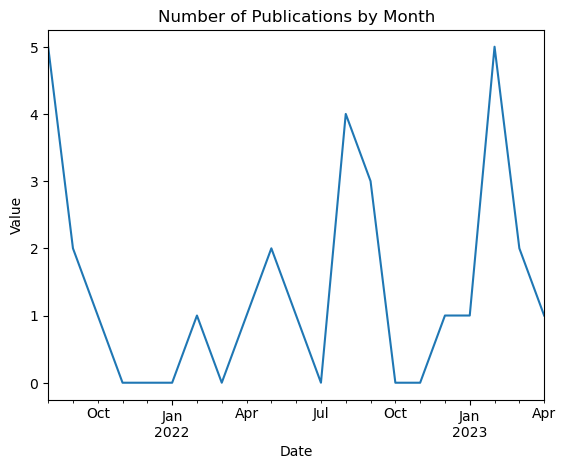

In [14]:
linegraph.plot(kind='line', title='Number of Publications by Month', xlabel='Date', ylabel='Value')

While the peak in August 2021 that I was expecting did occur, I also noticed another peak in February 2022, which coincided with Biden's announcement to end the pandemic emergency SNAP benefits.


# Data Analysis

## Word Clouds, Lexical Densities
The first form of data analyses I ran were word clouds and lexical densities.


In [15]:
# importing necessary libraries
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import glob

In [17]:
for i, row in grouped_df.iterrows(): 

    soup = BeautifulSoup(row['text'])
    article = soup.get_text()
    
    publication = row['publication']
    doc_type = row['doc_type']


    # Use f-strings to create the file name
    file_name = f"files/{publication}_{doc_type}s.txt"
    
    with open(file_name, "w") as file: 
        file.write(article)


In [18]:
stops = stopwords.words('english') #importing nltk's English stopwords
directory = 'files'
files = glob.glob(f"{directory}/*.txt")  

In [20]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# this function was taken from lecture

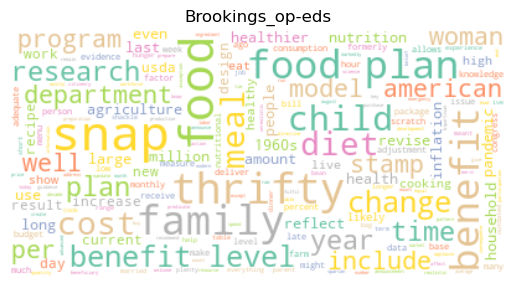

0.5553956834532374


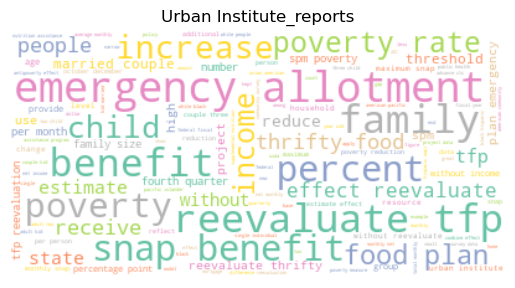

0.18455623197693047


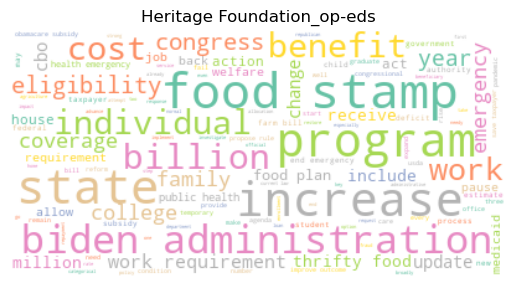

0.43775933609958506


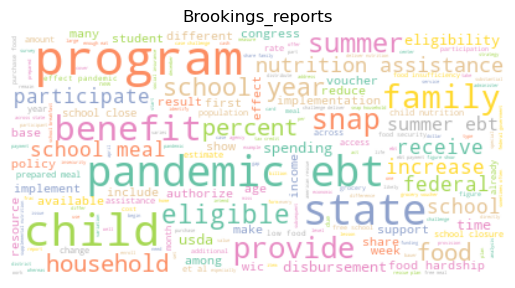

0.2579155672823219


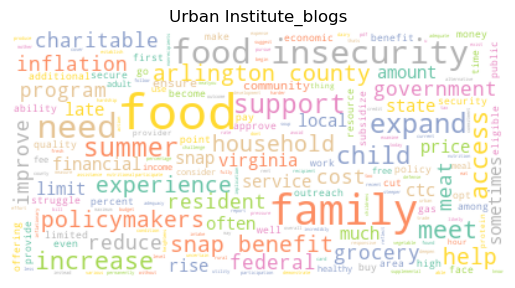

0.4763705103969754


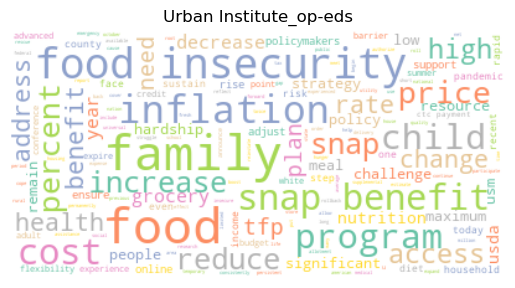

0.47435897435897434


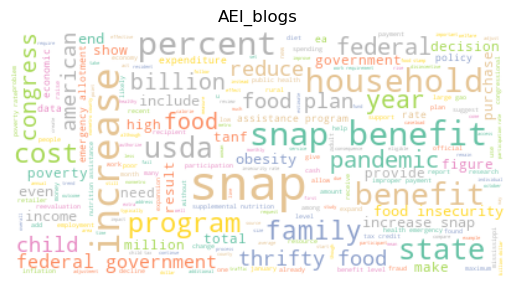

0.24916652044218285


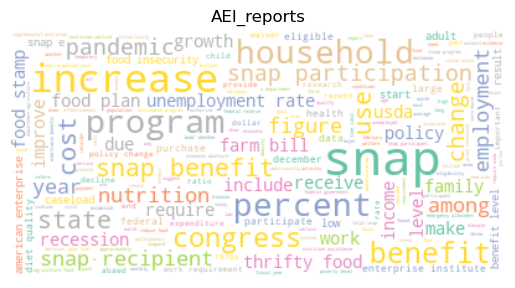

0.23920036764705882


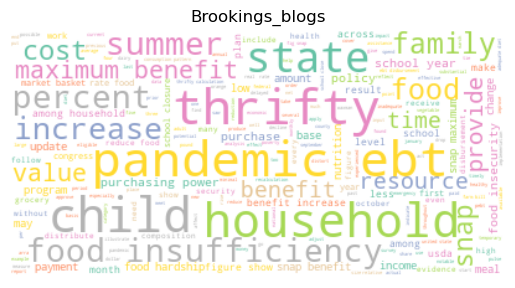

0.2977638289525304


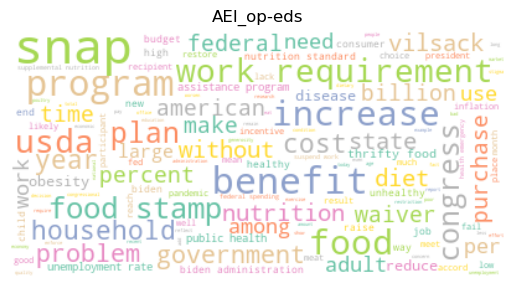

0.4373642288196959


In [21]:
id = 0
lexical_density = []
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    
# save cleaned files
    file_name = filepath.split("/")[-1]
    file_name = file_name.split(".")[0]
    with open(f"files_cleaned/{file_name}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(file_name)
    plt.show()

# save Word Clouds
    wordcloud.to_file(f"wordclouds/wordcloud_{file_name}.png")

# lexical density
    ld_results = len(set(text_clean)) / len(text_clean) # unlike the lecture, I want to analyze the whole text, not just a slice
    print(ld_results)
    ld_dict = {'File_name': file_name, 'lexical_density': ld_results}
    lexical_density.append(ld_dict)


### Adding Stop Words

We can see that the word clouds include author names, think tank names, and words that may not be meaningful in a comparison. Because we are comparing how different think tanks write about SNAP benefits, words like “benefits” and “program” would not be helpful to include in the analysis. Therefore, I added author names, think tank names, and SNAP benefit/think tank-related words to the stop words list.


In [22]:
# To add author names to stop words, I first pulled the names from the author 1 and author 2 columns and separated the first and last names so each name would be its own string 


author_list = []

for author in publications_df['author 1']: 
    first_name, last_name = author.split(' ', 1)
    if first_name.lower() not in author_list and last_name.lower() not in author_list: # this ensures each author is only added once
        author_list.append(first_name.lower())
        author_list.append(last_name.lower())

for author in publications_df['author 2']: 
    if pd.isnull(author): 
        continue 
    else: 
        first_name, last_name = author.split(' ', 1)
        if first_name.lower() not in author_list and last_name.lower() not in author_list:
            author_list.append(first_name.lower())
            author_list.append(last_name.lower())

# i created my own for/if loop, but adapted a name splitter from this: https://stackoverflow.com/questions/57463127/splitting-a-column-in-dataframe-using-str-split-function

In [23]:
stops = stopwords.words('english')

new_stopwords = ["brookings", "institute", "institution", "policy", "center", "facebook", "heritage", "urban", "aei", 
                 "enterprise", "program", "news", "program", "benefits", "benefit", "snap", "percent", "programs"]
stops.extend(new_stopwords)
stops.extend(author_list) # i used extend instead of append to add multiple items, used this as reference: https://www.freecodecamp.org/news/python-list-append-vs-python-list-extend/


### Rerunning the word clouds and lexical densities with the new stop words


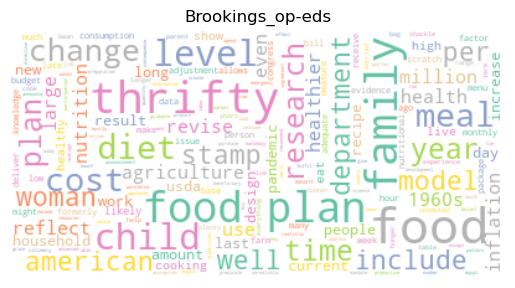

0.583206106870229


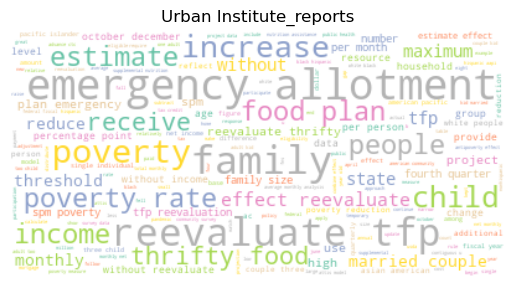

0.1976298361798536


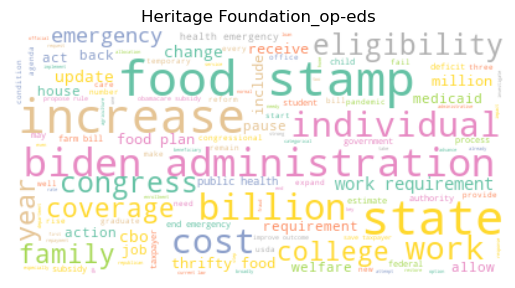

0.44673295454545453


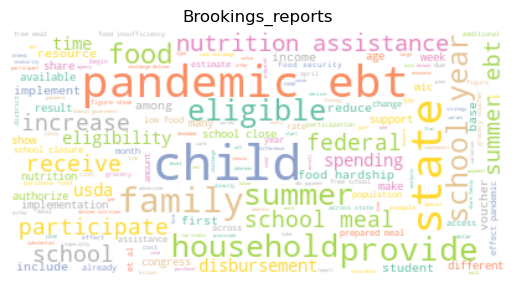

0.2717876438806671


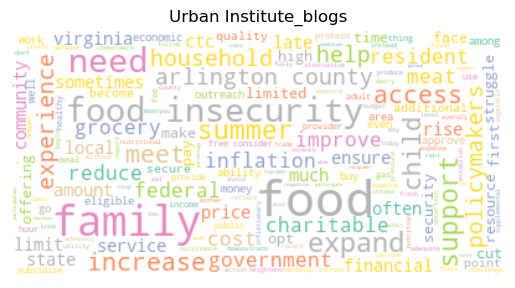

0.4881422924901186


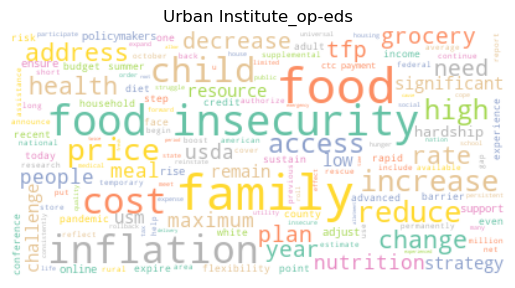

0.5037783375314862


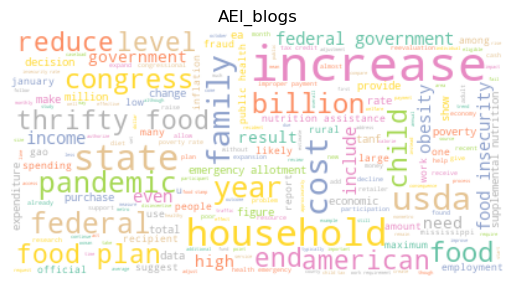

0.271192942079018


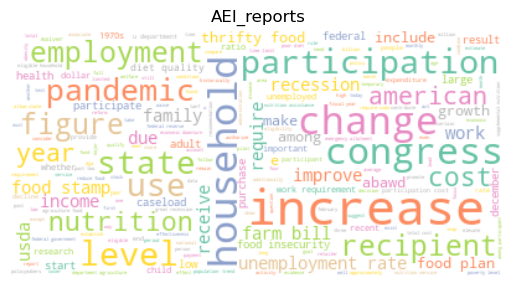

0.26416539050535986


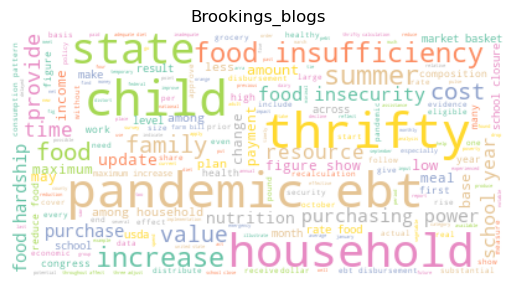

0.3126819126819127


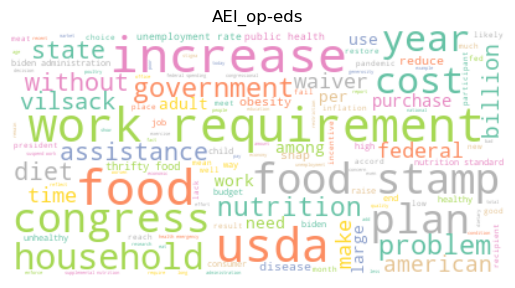

0.4627906976744186


In [24]:
id = 0
lexical_density_clean = []
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    
# save cleaned files
    file_name = filepath.split("/")[-1]
    file_name = file_name.split(".")[0]
    with open(f"files_cleaned/{file_name}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(file_name)
    plt.show()

# save Word Clouds
    wordcloud.to_file(f"wordclouds_clean/wordcloud_{file_name}.png")

# lexical density
    ld_results = len(set(text_clean)) / len(text_clean) # unlike the lecture, I want to analyze the whole text, not just a slice
    print(ld_results)
    ld_dict = {'File_name': file_name, 'lexical_density': ld_results}
    lexical_density_clean.append(ld_dict)


What stands out to me is that right-leaning think tanks use the outdated and stigmatized term “food stamps” to refer to SNAP benefits. Interestingly, this term doesn't appear in any of Brookings’ or Urban’s word clouds but is prominent in Heritage’s and AEI’s. It’s worth nothing that SNAP benefits were renamed in 2007 because of the stigma associated with the term “food stamp” and the term is clearly not being used in the left-leaning think tanks, but are in the right-leaning ones. 

I also noticed that words like “child” and “family” are more prominent in the left-leaning think tank word clouds, perhaps to present SNAP beneficiaries as sympathetic. 


## Lexical Densities

In [25]:
lexicaldensity_df = pd.DataFrame(lexical_density)
lexicaldensity_df = lexicaldensity_df.sort_values(by='lexical_density', ascending=False)
lexicaldensity_df

,File_name,lexical_density
0,Brookings_op-eds,0.555396
4,Urban Institute_blogs,0.476371
5,Urban Institute_op-eds,0.474359
2,Heritage Foundation_op-eds,0.437759
9,AEI_op-eds,0.437364
8,Brookings_blogs,0.297764
3,Brookings_reports,0.257916
6,AEI_blogs,0.249167
7,AEI_reports,0.239200
1,Urban Institute_reports,0.184556


Interestingly, reports have the lowest lexical density, and op-eds have the highest. 


### Lexical Densities by Same Publication Type

In [26]:
oped_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('op-eds')]
oped_lexical

,File_name,lexical_density
0,Brookings_op-eds,0.555396
5,Urban Institute_op-eds,0.474359
2,Heritage Foundation_op-eds,0.437759
9,AEI_op-eds,0.437364


In [27]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('reports')]
reports_lexical

,File_name,lexical_density
3,Brookings_reports,0.257916
7,AEI_reports,0.239200
1,Urban Institute_reports,0.184556


In [28]:
blogs_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('blogs')]
blogs_lexical

,File_name,lexical_density
4,Urban Institute_blogs,0.476371
8,Brookings_blogs,0.297764
6,AEI_blogs,0.249167


AEI has the smallest lexical densities across all publication types. This observation, compounded by the fact that AEI has the most publications, may indicate that AEI values a quantity-over-quality approach to its publications. 


# TF-IDF

The next analysis I ran was TF-IDF to identify the most important words and compare them across think tanks. 


In [29]:
# importing necessary packages
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# initializing TfidVectorizer object
tfidf_vectorizer = TfidfVectorizer(input = 'filename', stop_words = stops)
type(tfidf_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [32]:
text_titles = [Path(text).stem for text in files]
text_titles 

['Brookings_op-eds',
 'Urban Institute_reports',
 'Heritage Foundation_op-eds',
 'Brookings_reports',
 'Urban Institute_blogs',
 'Urban Institute_op-eds',
 'AEI_blogs',
 'AEI_reports',
 'Brookings_blogs',
 'AEI_op-eds']

In [34]:
# creating a dataframe of each term's tf-idf score for each file
tfidf_vector = tfidf_vectorizer.fit_transform(files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index = text_titles, columns = tfidf_vectorizer.get_feature_names_out()) #array format dataaset
tfidf_df

,000,003,007,020,021,025,029,039,040,05,...,wyoming,year,yearautomatically,years,yet,york,young,younger,zero,ziliak
Brookings_op-eds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.031579,0.000000,0.063159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Urban Institute_reports,0.007655,0.000000,0.000000,0.000000,0.038674,0.006446,0.006446,0.006446,0.006446,0.000000,...,0.010959,0.023492,0.000000,0.023492,0.011483,0.004794,0.000000,0.000000,0.000000,0.000000
Heritage Foundation_op-eds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.032058,0.000000,0.056101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brookings_reports,0.003917,0.006596,0.006596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005607,0.114852,0.006596,0.005342,0.011750,0.000000,0.000000,0.019787,0.000000,0.000000
Urban Institute_blogs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Urban Institute_op-eds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064017,0.000000,0.012803,0.000000,0.000000,0.023514,0.000000,0.031617,0.000000
AEI_blogs,0.009440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.054718,0.000000,0.057937,0.009440,0.005911,0.005911,0.000000,0.000000,0.000000
AEI_reports,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.057154,0.000000,0.045723,0.011175,0.000000,0.006998,0.000000,0.000000,0.000000
Brookings_blogs,0.027742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.075675,0.000000,0.023648,0.013871,0.000000,0.000000,0.000000,0.000000,0.011679
AEI_op-eds,0.000000,0.000000,0.000000,0.023798,0.000000,0.000000,0.000000,0.000000,0.000000,0.023798,...,0.000000,0.067461,0.000000,0.038549,0.000000,0.017699,0.000000,0.000000,0.000000,0.000000


In [35]:
tfidf_df.to_csv('tfidf_df.csv') 
# exported this to csv to view all of the terms, using this csv I pulled some terms that I was interested in investigating 

In [36]:
# pulling words that I'm interested in 

tfidf_slice = tfidf_df[['dependence', 'dependent', 'stamp', 'stamps', 'biden', 'spending', 'work', 'taxpayers', 'family', 'children', 'expand', 'reduce']]
tfidf_slice.sort_index().round(decimals = 2)

,dependence,dependent,stamp,stamps,biden,spending,work,taxpayers,family,children,expand,reduce
AEI_blogs,0.02,0.01,0.01,0.03,0.04,0.05,0.07,0.02,0.04,0.06,0.00,0.02
AEI_op-eds,0.00,0.00,0.13,0.03,0.18,0.07,0.25,0.00,0.01,0.04,0.01,0.04
AEI_reports,0.00,0.02,0.06,0.02,0.00,0.01,0.13,0.00,0.01,0.04,0.01,0.01
Brookings_blogs,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.02,0.13,0.00,0.01
Brookings_op-eds,0.00,0.00,0.04,0.05,0.00,0.02,0.02,0.00,0.07,0.12,0.00,0.00
Brookings_reports,0.00,0.00,0.01,0.00,0.00,0.05,0.01,0.00,0.02,0.18,0.00,0.01
Heritage Foundation_op-eds,0.00,0.00,0.12,0.12,0.29,0.01,0.21,0.13,0.02,0.01,0.03,0.02
Urban Institute_blogs,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.10,0.03
Urban Institute_op-eds,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.11,0.02,0.07
Urban Institute_reports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.08,0.00,0.00


What stood out to me here is that “stamp” (like in “food stamp”), “work” (like in “work requirements”), “Biden”, and “taxpayer” have higher TF-IDF values in the right-leaning think tanks, while words like “expand” and “children” have higher TF-IDF values in the left-leaning think tanks. This suggests that right-leaning think tanks are more concerned about the program’s costs to taxpayers and that work requirements are an essential part of the program to them. 

Similar to the word clouds, it shows that right-leaning think tanks use the outdated, stigmatized “food stamps” to refer to SNAP benefits. 

I encountered some challenges while conducting the analysis. Because the TF-IDF DataFrame treated each word separately and there was no stemming, words like “stamp” and “stamps” were regarded as separate terms, and I had to consider them separately. Secondly, TF-IDF values couldn’t be run on muli-word terms like “food stamps” or “work requirements”.


In [37]:
# this is creating a row for each term for document tuype
tfidf_df_long = tfidf_df.stack().reset_index()
tfidf_df_long = tfidf_df_long.rename(columns={0:'tfidf', 'level_0': 'document type','level_1': 'term'})
tfidf_df_long

,document type,term,tfidf
0,Brookings_op-eds,000,0.000000
1,Brookings_op-eds,003,0.000000
2,Brookings_op-eds,007,0.000000
3,Brookings_op-eds,020,0.000000
4,Brookings_op-eds,021,0.000000
...,...,...,...
40275,AEI_op-eds,york,0.017699
40276,AEI_op-eds,young,0.000000
40277,AEI_op-eds,younger,0.000000
40278,AEI_op-eds,zero,0.000000


In [38]:
# pulling the top 10 tf-idf's for each document type
top_tfidf = tfidf_df_long.sort_values(by = ['document type', 'tfidf'], ascending = [True, False]).groupby(['document type']).head(10)
top_tfidf

,document type,term,tfidf
25843,AEI_blogs,food,0.285048
25776,AEI_blogs,federal,0.170592
26825,AEI_blogs,pandemic,0.157717
26061,AEI_blogs,households,0.154499
25952,AEI_blogs,government,0.147229
...,...,...,...
4472,Urban Institute_reports,allotments,0.179095
6524,Urban Institute_reports,non,0.170484
7493,Urban Institute_reports,spm,0.142466
6457,Urban Institute_reports,monthly,0.128823


### Comparing Top TF-IDF Values for Op-Eds

In [39]:
top_tfidf[top_tfidf['document type'] == 'AEI_op-eds']

,document type,term,tfidf
37927,AEI_op-eds,food,0.281557
40244,AEI_op-eds,work,0.253543
39413,AEI_op-eds,requirements,0.211978
36909,AEI_op-eds,biden,0.176994
38785,AEI_op-eds,nutrition,0.149577
40152,AEI_op-eds,vilsack,0.141614
37203,AEI_op-eds,congress,0.139208
40110,AEI_op-eds,usda,0.134922
39731,AEI_op-eds,stamp,0.127607
40060,AEI_op-eds,unemployment,0.127187


In [40]:
top_tfidf[top_tfidf['document type'] == 'Heritage Foundation_op-eds']

,document type,term,tfidf
8713,Heritage Foundation_op-eds,biden,0.294379
9731,Heritage Foundation_op-eds,food,0.234145
12048,Heritage Foundation_op-eds,work,0.210848
8929,Heritage Foundation_op-eds,college,0.178116
8443,Heritage Foundation_op-eds,administration,0.164530
10048,Heritage Foundation_op-eds,individuals,0.164530
11217,Heritage Foundation_op-eds,requirements,0.164530
11551,Heritage Foundation_op-eds,states,0.164002
9120,Heritage Foundation_op-eds,coverage,0.151415
9454,Heritage Foundation_op-eds,emergency,0.136245


In [41]:
top_tfidf[top_tfidf['document type'] == 'Brookings_op-eds']

,document type,term,tfidf
1675,Brookings_op-eds,food,0.345977
2758,Brookings_op-eds,plan,0.236845
3700,Brookings_op-eds,thrifty,0.205266
3708,Brookings_op-eds,time,0.190394
3278,Brookings_op-eds,saving,0.155963
2327,Brookings_op-eds,meal,0.154691
3031,Brookings_op-eds,recipes,0.116973
824,Brookings_op-eds,children,0.115326
1589,Brookings_op-eds,families,0.115326
2198,Brookings_op-eds,levels,0.103851


In [42]:
top_tfidf[top_tfidf['document type'] == 'Urban Institute_op-eds']

,document type,term,tfidf
21815,Urban Institute_op-eds,food,0.502641
21729,Urban Institute_op-eds,families,0.292233
22168,Urban Institute_op-eds,insecurity,0.288537
22145,Urban Institute_op-eds,inflation,0.163651
24005,Urban Institute_op-eds,usm,0.126467
20508,Urban Institute_op-eds,address,0.125435
23814,Urban Institute_op-eds,tfp,0.117571
20964,Urban Institute_op-eds,children,0.105204
22999,Urban Institute_op-eds,prices,0.101836
22726,Urban Institute_op-eds,online,0.094057


### Comparing Top TF-IDF Values for Reports

In [43]:
top_tfidf[top_tfidf['document type'] == 'AEI_reports']

,document type,term,tfidf
29871,AEI_reports,food,0.253946
30879,AEI_reports,participation,0.197220
30729,AEI_reports,nutrition,0.173936
29147,AEI_reports,congress,0.146769
32004,AEI_reports,unemployment,0.145269
28312,AEI_reports,2020,0.137596
31691,AEI_reports,states,0.133009
32188,AEI_reports,work,0.125304
29804,AEI_reports,federal,0.114308
30853,AEI_reports,pandemic,0.114308


In [44]:
top_tfidf[top_tfidf['document type'] == 'Brookings_reports']

,document type,term,tfidf
13436,Brookings_reports,ebt,0.477830
14741,Brookings_reports,pandemic,0.288464
15380,Brookings_reports,school,0.269768
15579,Brookings_reports,states,0.215413
15680,Brookings_reports,summer,0.201822
13759,Brookings_reports,food,0.199961
12908,Brookings_reports,children,0.180453
12200,Brookings_reports,2020,0.144680
14412,Brookings_reports,meals,0.125899
14617,Brookings_reports,nutrition,0.121927


In [45]:
top_tfidf[top_tfidf['document type'] == 'Urban Institute_reports']

,document type,term,tfidf
7702,Urban Institute_reports,tfp,0.412273
7088,Urban Institute_reports,reevaluated,0.372603
6832,Urban Institute_reports,poverty,0.301634
5906,Urban Institute_reports,hispanic,0.284932
5426,Urban Institute_reports,emergency,0.182717
4472,Urban Institute_reports,allotments,0.179095
6524,Urban Institute_reports,non,0.170484
7493,Urban Institute_reports,spm,0.142466
6457,Urban Institute_reports,monthly,0.128823
5397,Urban Institute_reports,effect,0.125899


## Sentiment Analysis

The final data analysis method I ran was a sentiment analysis. Initially, I used VADER to find compound scores for each type of publication type. 

I found it surprised the compound scores were so close to 1.0 and -1.0, so I also pulled the positive and negative sentiment scores. (It’s also a little bizarre to me that the compound scores for each publication type were close to 1.0 except for Urban Institute’s reports, which are completely the opposite, close to -1.0)



In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [47]:
def compound_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text) 
    compound_scores = scores['compound'] #using compound scores
    return compound_scores

In [48]:
grouped_df['compound_score'] = grouped_df['text'].apply(compound_sentiment)
grouped_df

,publication,doc_type,text,compound_score
2,AEI,report,Key Points Participation in the Supplemental ...,0.9999
5,Brookings,report,"Over the past 18 months, the United States exp...",1.0000
9,Urban Institute,report,Effect of the Reevaluated Thrifty Food Plan an...,-0.9993
1,AEI,op-ed,Biden ignores Congress to increase SNAP Most A...,0.7649
4,Brookings,op-ed,The Agriculture Departments announcement that ...,0.9983
6,Heritage Foundation,op-ed,A letter from the Congressional Budget Office ...,0.9994
8,Urban Institute,op-ed,Today the US Department of Agriculture (USDA) ...,0.9909
0,AEI,blog,"This week, President Bidens administration inc...",0.9987
3,Brookings,blog,"Come October, the maximum benefit levels in th...",0.9998
7,Urban Institute,blog,"Each summer, families with children struggle t...",0.9983


I was pretty surprised the compound scores were so close to 1.0 and -1.0, so I also pulled the positive and negative sentiment scores. 

In [49]:
def positive_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text) 
    positive_scores = scores['pos'] #using compound scores
    return positive_scores
# this function was taken from lecture

In [50]:
def negative_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text) 
    negative_scores = scores['neg'] #using compound scores
    return negative_scores

In [51]:
grouped_df['positive_score'] = grouped_df['text'].apply(positive_sentiment)
grouped_df['negative_score'] = grouped_df['text'].apply(negative_sentiment)


The positive scores and negative scores are both pretty low, so the high compound scores are still quite surprising. Although the compound score is more commonly used in sentiment analyses, I wanted to compare the positive and negative scores because they varied more than the compound scores.

In [52]:
grouped_df = grouped_df.sort_values(by='positive_score', ascending=False)
grouped_df

,publication,doc_type,text,compound_score,positive_score,negative_score
7,Urban Institute,blog,"Each summer, families with children struggle t...",0.9983,0.164,0.053
8,Urban Institute,op-ed,Today the US Department of Agriculture (USDA) ...,0.9909,0.136,0.098
6,Heritage Foundation,op-ed,A letter from the Congressional Budget Office ...,0.9994,0.126,0.066
3,Brookings,blog,"Come October, the maximum benefit levels in th...",0.9998,0.122,0.057
1,AEI,op-ed,Biden ignores Congress to increase SNAP Most A...,0.7649,0.121,0.112
2,AEI,report,Key Points Participation in the Supplemental ...,0.9999,0.120,0.072
0,AEI,blog,"This week, President Bidens administration inc...",0.9987,0.117,0.102
5,Brookings,report,"Over the past 18 months, the United States exp...",1.0000,0.111,0.035
4,Brookings,op-ed,The Agriculture Departments announcement that ...,0.9983,0.105,0.028
9,Urban Institute,report,Effect of the Reevaluated Thrifty Food Plan an...,-0.9993,0.092,0.110


In [53]:
grouped_df = grouped_df.sort_values(by='negative_score', ascending=False)
grouped_df


,publication,doc_type,text,compound_score,positive_score,negative_score
1,AEI,op-ed,Biden ignores Congress to increase SNAP Most A...,0.7649,0.121,0.112
9,Urban Institute,report,Effect of the Reevaluated Thrifty Food Plan an...,-0.9993,0.092,0.110
0,AEI,blog,"This week, President Bidens administration inc...",0.9987,0.117,0.102
8,Urban Institute,op-ed,Today the US Department of Agriculture (USDA) ...,0.9909,0.136,0.098
2,AEI,report,Key Points Participation in the Supplemental ...,0.9999,0.120,0.072
6,Heritage Foundation,op-ed,A letter from the Congressional Budget Office ...,0.9994,0.126,0.066
3,Brookings,blog,"Come October, the maximum benefit levels in th...",0.9998,0.122,0.057
7,Urban Institute,blog,"Each summer, families with children struggle t...",0.9983,0.164,0.053
5,Brookings,report,"Over the past 18 months, the United States exp...",1.0000,0.111,0.035
4,Brookings,op-ed,The Agriculture Departments announcement that ...,0.9983,0.105,0.028


It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.


## Using Flair Instead of VADER

It’s surprising that the publications are pretty evenly dispersed by negative and positive scores. This might be because Biden announced an increase SNAP benefits and then announced the end of the pandemic emergency SNAP benefits. 

However, I was still a little skeptical of the seemingly extreme compound scores. When looking into this, I discovered that VADER was written to run sentiment analyses on shorter, social media posts and may not be suitable for longer academic writing with complex sentences ([Real Python](https://realpython.com/python-nltk-sentiment-analysis/)). Complex sentences have more neutral words, which can skew the VADER analysis.

Further research into sentiment analysis revealed that Flair is more appropriate for longer texts ([DiBattista](https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb)), so I ran a sentiment analysis again using Flair.



In [54]:
import flair

In [55]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')


In [56]:
def flair_sentiment(text, column_name):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].score 

grouped_df['flair_score'] = grouped_df['text'].apply(flair_sentiment, column_name='text')

#adapted from:  https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f

In [57]:
grouped_df

,publication,doc_type,text,compound_score,positive_score,negative_score,flair_score
1,AEI,op-ed,Biden ignores Congress to increase SNAP Most A...,0.7649,0.121,0.112,0.999693
9,Urban Institute,report,Effect of the Reevaluated Thrifty Food Plan an...,-0.9993,0.092,0.110,0.982688
0,AEI,blog,"This week, President Bidens administration inc...",0.9987,0.117,0.102,0.996843
8,Urban Institute,op-ed,Today the US Department of Agriculture (USDA) ...,0.9909,0.136,0.098,0.999445
2,AEI,report,Key Points Participation in the Supplemental ...,0.9999,0.120,0.072,0.987393
6,Heritage Foundation,op-ed,A letter from the Congressional Budget Office ...,0.9994,0.126,0.066,0.998445
3,Brookings,blog,"Come October, the maximum benefit levels in th...",0.9998,0.122,0.057,0.999920
7,Urban Institute,blog,"Each summer, families with children struggle t...",0.9983,0.164,0.053,0.955912
5,Brookings,report,"Over the past 18 months, the United States exp...",1.0000,0.111,0.035,0.998817
4,Brookings,op-ed,The Agriculture Departments announcement that ...,0.9983,0.105,0.028,0.915947


I was surprised to find that the Flair scores were not significantly different from VADER’s compound scores. There also doesn’t seem to be too much correlation between the two. For instance, AEI’s op-eds had a relatively neutral compound score but received one of the highest Flair scores. This may indicate  that, unfortunately, sentiment analysis is better suited for shorter social media posts rather than longer academic writing. 

# Conclusion

This study used various text analysis methods to compare publication types across think tanks. Methods included word clouds, lexical density, TF-IDF, and sentiment analysis found that right-leaning think tanks use the stigmatized “food stamps” and focus on work requirements and costs to taxpayers, while left-leaning think tanks use words like “expand” and “children” to portray SNAP beneficiaries as sympathetic. Right-leaning think tank AEI had by far the most publications and the smallest lexical density, which may indicate a different type of approach to publications. However, sentiment analysis proved to be better suited for shorter texts and did not yield meaningful results. 
